# Курсовой проект

### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

### Описание датасета

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

### Пути к директориям и файлам

In [3]:
DATASET_PATH = './train.csv'
DATASET_PATH_TEST = './test.csv'

In [4]:
train_df = pd.read_csv(DATASET_PATH, sep=',')
test_df = pd.read_csv(DATASET_PATH_TEST, sep=',')
train_df.head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630


## Обработка пропусков

In [5]:
train_df['LifeSquare'] = train_df['LifeSquare'].fillna(train_df['LifeSquare'].median())

In [6]:
test_df['LifeSquare'] = test_df['LifeSquare'].fillna(test_df['LifeSquare'].median())

In [7]:
train_df['Healthcare_1'] = train_df['Healthcare_1'].fillna(train_df['Healthcare_1'].median())

In [8]:
test_df['Healthcare_1'] = test_df['Healthcare_1'].fillna(test_df['Healthcare_1'].median())

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

## Обработка выбросов

In [11]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [12]:
class DataPreprocessing:

    def __init__(self):
        self.medians = None
        
    def fit(self, X):    
        self.medians = X.median()
    
    def transform(self, X):

        # Rooms
        X.loc[X['Rooms'] == 0, 'Rooms'] = self.medians['Rooms']
        
        #Square
        X.loc[X['Square'] > 600, 'Square'] = self.medians['Square']
        
        #LifeSquare
        X.loc[X['LifeSquare'] > 600, 'LifeSquare'] = self.medians['LifeSquare']
        
        #KitchenSquare
        X.loc[X['KitchenSquare'] > 50, 'KitchenSquare'] = self.medians['KitchenSquare']
        
        #HouseYear
        X.loc[X['HouseYear'] > 2022, 'HouseYear'] = self.medians['HouseYear']
        
        #Floor
        X.loc[X['Floor'] == 0, 'Floor'] = self.medians['Floor']
        return X         

In [13]:
preprocessor = DataPreprocessing()
preprocessor.fit(train_df)

train_df = preprocessor.transform(train_df)
test_df = preprocessor.transform(test_df)

In [14]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.892100,56.201701,35.460721,5.747400,8.526700,12.609400,1984.863800,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.837811,19.472731,17.025216,4.137669,5.241148,6.775974,18.409979,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513040,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.890819,41.421759,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,409.425181,461.463614,48.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [15]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910800,56.449500,35.485549,5.759600,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.837725,19.092787,15.915345,4.073663,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,44.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


## Построение новых признаков

#### Изменяем категориальные признаки на бинарные переменные

In [16]:
refresh = {"A": 0,"B": 1}

train_df["Ecology_2"] = train_df["Ecology_2"].map(refresh)
train_df["Ecology_3"] = train_df["Ecology_3"].map(refresh)
train_df["Shops_2"] = train_df["Shops_2"].map(refresh)

test_df["Ecology_2"] = test_df["Ecology_2"].map(refresh)
test_df["Ecology_3"] = test_df["Ecology_3"].map(refresh)
test_df["Shops_2"] = test_df["Shops_2"].map(refresh)

#### Построим новые признаки

In [17]:
def age_to_cat(X):

    X['Age_cat'] = 0

    X.loc[X['HouseYear'] >= 2010, 'Age_cat'] = 1  
    X.loc[(X['HouseYear'] >= 2001) & (X['HouseYear'] < 2010), 'Age_cat'] = 2
    X.loc[(X['HouseYear'] >= 1991) & (X['HouseYear'] < 2001), 'Age_cat'] = 3
    X.loc[(X['HouseYear'] >= 1981) & (X['HouseYear'] < 1991), 'Age_cat'] = 4
    X.loc[(X['HouseYear'] >= 1970) & (X['HouseYear'] < 1981), 'Age_cat'] = 5
    X.loc[X['HouseYear'] < 1970, 'Age_cat'] = 6

    return X

In [18]:
train_df = age_to_cat(train_df)

In [19]:
test_df = age_to_cat(test_df)

In [20]:
def DistrictId_to_cat(X):

    X['DistrictId_cat'] = 0

    X.loc[X['DistrictId'] >= 165, 'DistrictId_cat'] = 1  
    X.loc[(X['DistrictId'] >= 125) & (X['DistrictId'] < 165), 'DistrictId_cat'] = 2
    X.loc[(X['DistrictId'] >= 85) & (X['DistrictId'] < 125), 'DistrictId_cat'] = 3
    X.loc[(X['DistrictId'] >= 45) & (X['DistrictId'] < 85), 'DistrictId_cat'] = 4
    X.loc[(X['DistrictId'] >= 0) & (X['DistrictId'] < 45), 'DistrictId_cat'] = 5

    return X

In [21]:
train_df = DistrictId_to_cat(train_df)

In [22]:
test_df = DistrictId_to_cat(test_df)

## Уменьшение размерности данных

In [23]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [24]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.68 MB
Memory usage after optimization is: 0.53 MB
Decreased by 68.2%


In [25]:
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 0.80 MB
Memory usage after optimization is: 0.25 MB
Decreased by 69.0%


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              10000 non-null  int16  
 1   DistrictId      10000 non-null  int16  
 2   Rooms           10000 non-null  float32
 3   Square          10000 non-null  float32
 4   LifeSquare      10000 non-null  float32
 5   KitchenSquare   10000 non-null  float32
 6   Floor           10000 non-null  float32
 7   HouseFloor      10000 non-null  float32
 8   HouseYear       10000 non-null  float32
 9   Ecology_1       10000 non-null  float32
 10  Ecology_2       10000 non-null  int8   
 11  Ecology_3       10000 non-null  int8   
 12  Social_1        10000 non-null  int8   
 13  Social_2        10000 non-null  int16  
 14  Social_3        10000 non-null  int16  
 15  Healthcare_1    10000 non-null  float32
 16  Helthcare_2     10000 non-null  int8   
 17  Shops_1         10000 non-null  

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              5000 non-null   int16  
 1   DistrictId      5000 non-null   int16  
 2   Rooms           5000 non-null   float32
 3   Square          5000 non-null   float32
 4   LifeSquare      5000 non-null   float32
 5   KitchenSquare   5000 non-null   float32
 6   Floor           5000 non-null   float32
 7   HouseFloor      5000 non-null   float32
 8   HouseYear       5000 non-null   float32
 9   Ecology_1       5000 non-null   float32
 10  Ecology_2       5000 non-null   int8   
 11  Ecology_3       5000 non-null   int8   
 12  Social_1        5000 non-null   int8   
 13  Social_2        5000 non-null   int16  
 14  Social_3        5000 non-null   int16  
 15  Healthcare_1    5000 non-null   float32
 16  Helthcare_2     5000 non-null   int8   
 17  Shops_1         5000 non-null   i

## Анализ признаков

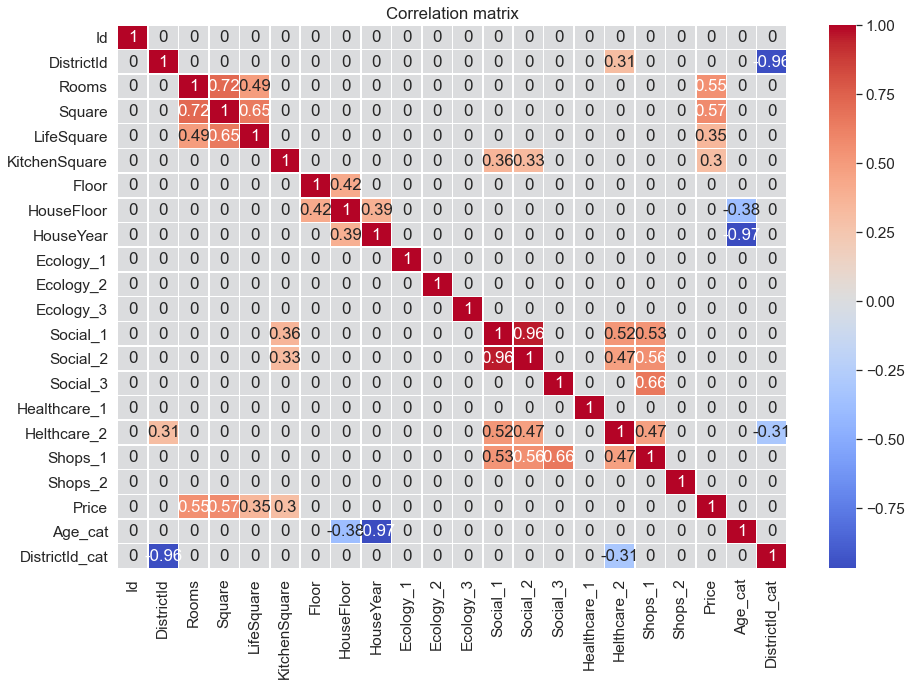

In [28]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

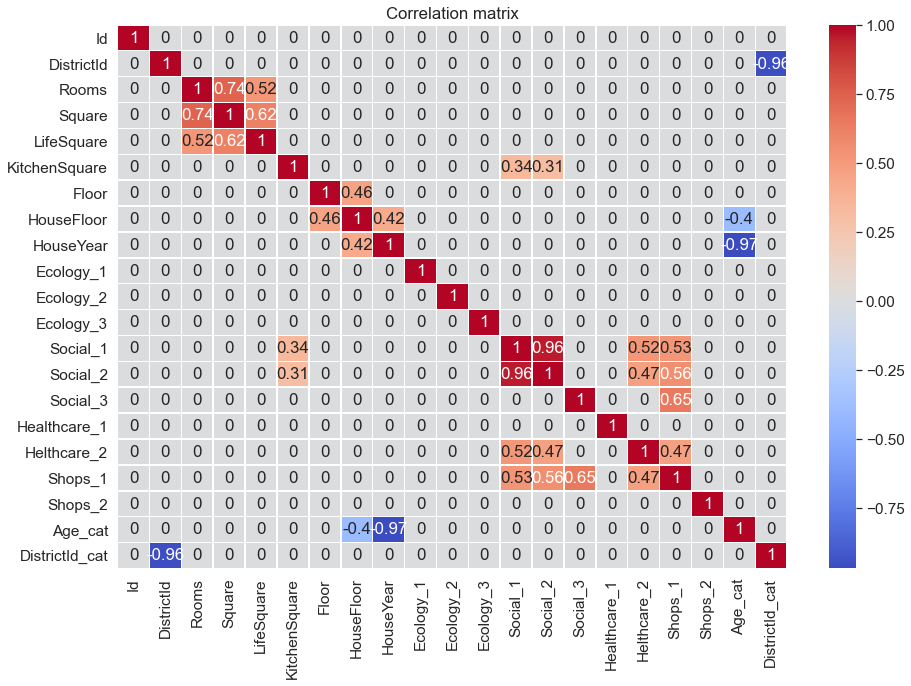

In [29]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = test_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

#### Благодаря матрице корреляций мы может исключить из данных одну из категорий - Social_1 или Social_2

## Исключение ненужных признаков

In [30]:
train_df.drop(columns=['Social_2', 'Id', 'DistrictId', 'HouseYear'], inplace=True)

In [31]:
test_df.drop(columns=['Social_2', 'Id', 'DistrictId', 'HouseYear'], inplace=True)

## Разбиение на train и valid

In [32]:
feature_names = ['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Age_cat',
 'DistrictId_cat']

target_name = 'Price'

train_df = train_df[feature_names + [target_name]]

In [33]:
X = train_df[feature_names]
y = train_df[target_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

## Масштабирование признаков

In [34]:
cols_for_scaling = ['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Age_cat',
 'DistrictId_cat']

In [44]:
scaler = RobustScaler()
X_train[cols_for_scaling] = scaler.fit_transform(X_train[cols_for_scaling])
X_valid[cols_for_scaling] = scaler.fit_transform(X_valid[cols_for_scaling])
test_df[cols_for_scaling] = scaler.fit_transform(test_df[cols_for_scaling])

## Построение модели и ее оценка

In [45]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n")
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black') 
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

#### Благодаря кросс-валидации подбираем параметры - {'max_depth': 5, 'n_estimators': 270}

In [46]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=270)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                          n_estimators=270, random_state=42)

R2:	0.888



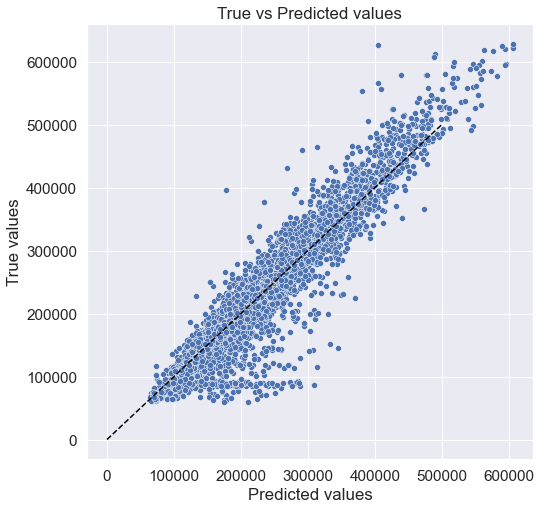

In [47]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.655



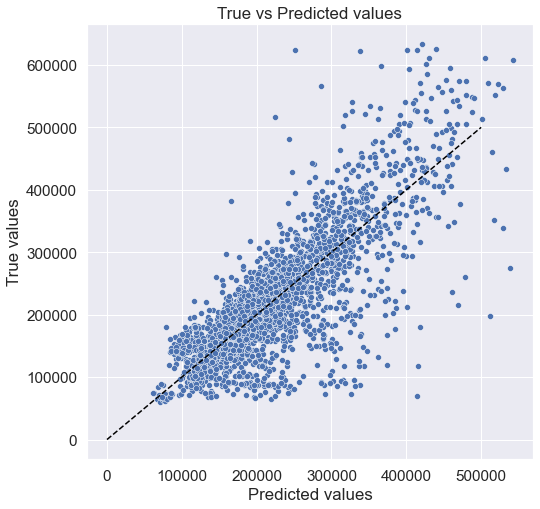

In [48]:
y_valid_preds = gb_model.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

## Прогнозирование на тестовом датасете 

In [49]:
predictions = gb_model.predict(test_df)

In [50]:
submit = pd.read_csv('sample_submission.csv')

In [54]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,162049.113847
1,5925,114425.237017
2,960,135608.529938
3,3848,132239.264698
4,746,179759.908906


In [55]:
submit.to_csv('submit2.csv', index=False)